# CNN (MNIST)

# Library

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [13]:
# hypter parameter setting
learning_rate = 1e-3
epochs = 20
display_step = 10 # 학습 몇번마다 확인할 것인지. 
batch_size = 64

activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # 파라미터 kernel size(2면 2x2), stride size, padding size 

### learning_rate =1e-4 > 1e-3
### batch_size = 32 > 64
### epochs = 30 > 20

# Load data & Pre-process data

len(train_data):  60000
len(test_data):  10000
data tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

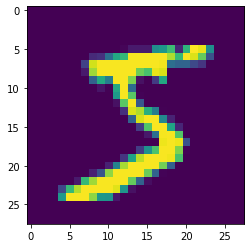

data shape: torch.Size([64, 1, 28, 28])
label: tensor([3, 6, 7, 4, 3, 4, 4, 1, 7, 2, 6, 8, 7, 9, 8, 3, 4, 8, 6, 3, 8, 4, 1, 6,
        0, 9, 1, 8, 4, 2, 0, 5, 2, 6, 6, 1, 6, 1, 2, 2, 4, 0, 6, 9, 5, 1, 8, 1,
        6, 0, 8, 0, 6, 1, 0, 1, 9, 7, 8, 7, 6, 7, 0, 6])


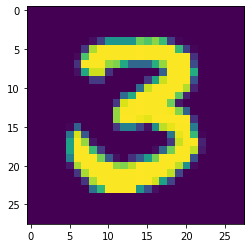

In [14]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
# transform 이미지를 텐서로 바꿔준다. , target_transform 원핫 인코딩 할 것인지.
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
# droplast 남는것 버려라. 
# num_workers cpu작업을 몇개의 코어를 사용해서 진행 할 지 대한 설정 파라미터.

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

# Model & Optimization and Loss function

In [15]:
# nn.Module 상속 반드시 받아줘야함 이유는 모름
# feature 추출부분 추출한 것 classifier
# flatten 입출력 matrix 이기 때문에 벡터 표현을 하기위하여 다 펴주는 작업. 
# conv2d 채널 1개라 1 만약 color면 3개 2번재 출력 채널 갯수 3para = 커널싸이즈

# 1 x 28 x28 이라하면 5x5를 3x3으로 했을때 
# nn.Conv2d(1,20,5)
# nn.Conv2d(20,50,5)
# 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(# 1x 28 x 28
            nn.Conv2d(1, 32, 5), #32 x 24 x 24  # number of input channel, number of output channel, kernel size   
            activation,          # we can set stride size and padding size. if we do not set the these parameters, default value is 1, 0.
            max_pool,          # 32x 12 x 12   
            #pooling 은 옵션이고 항상 사용하지 않아도 됨. 
            
            nn.Conv2d(32,64,5),#  64 x 8 x 8   
            activation,
            max_pool     # 64x 4 x 4
        )
        self.classifier = nn.Sequential( # nn.linear 항상 계산해서 구해줘야하냐? 
            nn.Linear(64 * 4 * 4, 100), # 100은 노드의 갯수이다. 
            activation,
            nn.Linear(100, 10)
        )

        
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 3, 3]
        flatten = extracted_feature.view(batch_size, -1) # [32, 576 (64 * 3 * 3)]
        result = self.classifier(flatten)
        return result

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

###  2개의층으로 구성 
###  1번째 conv 층은 입력1, 출력32, kernel 5 로 구성
###  2번째 conv 층은 입력32, 출력 64 , kernel 5로 구성

# Train & Test

In [16]:
loss_array = []

# train the model
for i in range(epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 0.037828247994184494
10 epoch loss: 0.0014398284256458282


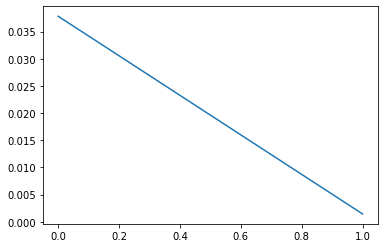

In [17]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [18]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

Accuracy of the model: 0.9915865659713745


# CNN (CIFAR10)

# Library

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [37]:
# hypter parameter setting
learning_rate = 1e-4
training_epochs = 150
display_step = 10
batch_size = 64
momentum = 0.9

activation = nn.ReLU()
activation2 = nn.Softmax()
max_pool = nn.MaxPool2d(2,2) # kerel size, stride size, padding size 


# Load data & Pre-process data

Files already downloaded and verified
Files already downloaded and verified
len(train_data):  50000
len(test_data):  10000
data tensor([[[0.2314, 0.2431, 0.2471],
         [0.1686, 0.1804, 0.1765],
         [0.1961, 0.1882, 0.1686],
         ...,
         [0.6196, 0.5176, 0.4235],
         [0.5961, 0.4902, 0.4000],
         [0.5804, 0.4863, 0.4039]],

        [[0.0627, 0.0784, 0.0784],
         [0.0000, 0.0000, 0.0000],
         [0.0706, 0.0314, 0.0000],
         ...,
         [0.4824, 0.3451, 0.2157],
         [0.4667, 0.3255, 0.1961],
         [0.4784, 0.3412, 0.2235]],

        [[0.0980, 0.0941, 0.0824],
         [0.0627, 0.0275, 0.0000],
         [0.1922, 0.1059, 0.0314],
         ...,
         [0.4627, 0.3294, 0.1961],
         [0.4706, 0.3294, 0.1961],
         [0.4275, 0.2863, 0.1647]],

        ...,

        [[0.8157, 0.6667, 0.3765],
         [0.7882, 0.6000, 0.1333],
         [0.7765, 0.6314, 0.1020],
         ...,
         [0.6275, 0.5216, 0.2745],
         [0.2196, 0.1216, 

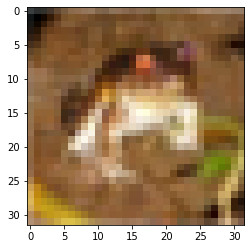

In [38]:
# load data
train_data = dataset.CIFAR10("/home/piai", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.CIFAR10("/home/piai", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

data shape: torch.Size([64, 3, 32, 32])
label: tensor([4, 4, 9, 0, 8, 7, 7, 2, 8, 0, 8, 9, 6, 9, 5, 7, 3, 6, 9, 6, 4, 6, 4, 8,
        4, 0, 8, 0, 9, 1, 8, 7, 0, 8, 0, 4, 7, 1, 8, 9, 7, 0, 0, 3, 9, 5, 0, 5,
        1, 6, 2, 8, 3, 1, 7, 2, 5, 6, 5, 9, 3, 6, 3, 7])


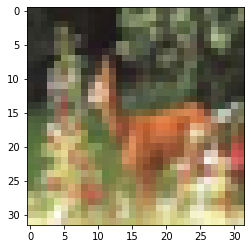

In [39]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

# Model & Optimization and Loss function

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            
            nn.Conv2d(3, 64, 3, padding=1), 
            nn.BatchNorm2d(64),                      
            activation,
            nn.Dropout(0.3),
            
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            activation,
            max_pool,
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            activation,
            max_pool, 
            
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            activation,
            max_pool,
            
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            max_pool,
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(0.4),
            
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            activation,
            max_pool,
            nn.Dropout(0.5),   )
        
            
        self.classifier = nn.Sequential(
            nn.Linear(512* 1 * 1, 400),
            nn.BatchNorm1d(400),
            activation,
            nn.Dropout(0.5),
            nn.Linear(400, 10)
            
        )
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 4, 4]
        
        flatten = extracted_feature.view(batch_size, -1) # [32, 64 * 4 * 4]
        result = self.classifier(flatten)
        return result

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr = learning_rate, momentum = 0.9)

In [41]:
loss_array = []

# train the model
for i in range(training_epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 1.6298366785049438
10 epoch loss: 0.778776228427887
20 epoch loss: 0.20316705107688904
30 epoch loss: 0.20289826393127441
40 epoch loss: 0.16921985149383545
50 epoch loss: 0.12249220162630081
60 epoch loss: 0.1744997501373291
70 epoch loss: 0.16936811804771423
80 epoch loss: 0.0032456705812364817
90 epoch loss: 0.02382301166653633
100 epoch loss: 0.06228671595454216
110 epoch loss: 0.015453238040208817
120 epoch loss: 0.13823463022708893
130 epoch loss: 0.008753345347940922
140 epoch loss: 0.26028382778167725


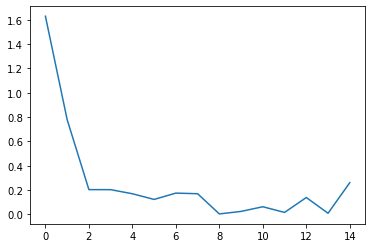

In [42]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [43]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

Accuracy of the model: 0.8920272588729858
